<a href="https://colab.research.google.com/github/heylarissa/seoul_bike_data/blob/master/Somativa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [58]:
df_bikes = pd.read_csv('seoul_bike_data - SeoulBikeData.csv', sep=',')

# Transformando os dados para o padrão americano - Substituindo o . por ,
df_bikes['Temperature(°C)'] = df_bikes['Temperature(°C)'].str.replace(',', '.').astype(float)
df_bikes['Dew point temperature(°C)'] = df_bikes['Dew point temperature(°C)'].str.replace(',', '.').astype(float)
df_bikes['Wind speed (m/s)'] = df_bikes['Wind speed (m/s)'].str.replace(',', '.').astype(float)
df_bikes['Solar Radiation (MJ/m2)'] = df_bikes['Solar Radiation (MJ/m2)'].str.replace(',', '.').astype(float)
df_bikes['Rainfall(mm)'] = df_bikes['Rainfall(mm)'].str.replace(',', '.').astype(float)
df_bikes['Snowfall (cm)'] = df_bikes['Snowfall (cm)'].str.replace(',', '.').astype(float)

df_bikes

,DateTime,Day,Weekday,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,2017-01-12 00:00:00,12,5,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,2017-01-12 01:00:00,12,5,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2017-01-12 02:00:00,12,5,2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,2017-01-12 03:00:00,12,5,3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,2017-01-12 04:00:00,12,5,4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,31,2,19,163,0.0,31,2.2,2000,-15.1,0.0,0.0,0.0
8756,2018-12-31 20:00:00,31,2,20,161,-1.0,32,0.9,2000,-15.6,0.0,0.0,0.0
8757,2018-12-31 21:00:00,31,2,21,179,-1.6,35,1.0,2000,-15.1,0.0,0.0,0.0
8758,2018-12-31 22:00:00,31,2,22,155,-2.1,36,1.7,2000,-15.2,0.0,0.0,0.0


### Preparação dos dados
Utilizei Random Forest para fazer a seleção de atributos

In [59]:
X = df_bikes[['Weekday', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]
y = df_bikes['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



### Divisão entre treino e teste

In [60]:
# Usar o teste estatístico (f_regression) para seleção de características
num_features_to_select = 5  # Escolha o número de características a serem selecionadas
selector = SelectKBest(score_func=f_regression, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Exibir as características selecionadas
selected_features = X.columns[selector.get_support()]
print("Características Selecionadas:\n", selected_features)

Características Selecionadas:
 Index(['Hour', 'Temperature(°C)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)'],
      dtype='object')


### Treinando o modelo
Como o objetivo é prever a quantidade de bicicletas alugadas, ou seja, uma variável contínua, se trata de um problema de regressão.

O modelo escolhido vou a Máquina de Vetores de Suporte, que generaliza o problema.

In [61]:
# Criar e treinar o modelo SVR
model = SVR(kernel='linear')
model.fit(X_train_selected, y_train)

# Prevê
y_pred = model.predict(X_test_selected)



### Visualiza previsões

Gráfico do SVM


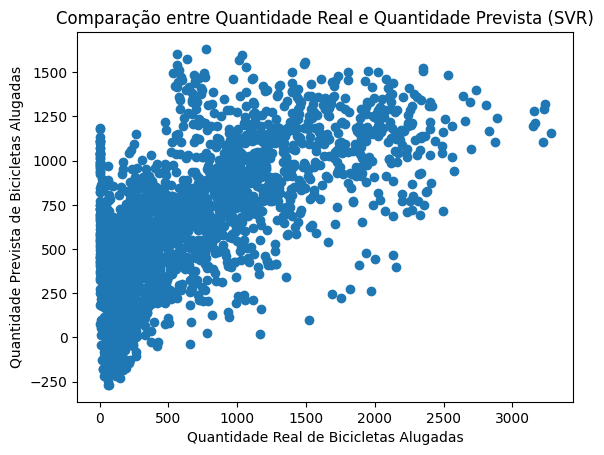


Previsões para o Conjunto de Teste:
       Real     Previsto
6056   963   760.745178
5556   668  1340.757500
5990   542   647.661794
7674  2034   777.145440
3319  1115   211.059369
...    ...          ...
1129   989   623.406155
4315  2288  1117.188064
6008  1163    19.812662
3438    69   458.282452
208    546   675.875350

[2190 rows x 2 columns]


In [62]:
# Visualiza as previsões
print("Gráfico do SVM")
plt.scatter(y_test, y_pred)
plt.xlabel("Quantidade Real de Bicicletas Alugadas")
plt.ylabel("Quantidade Prevista de Bicicletas Alugadas")
plt.title("Comparação entre Quantidade Real e Quantidade Prevista (SVR)")
plt.show()

# Mostrar as previsões para o conjunto de teste
predictions_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print("\nPrevisões para o Conjunto de Teste:\n", predictions_df)